In [6]:
from scipy.stats  import t, norm, poisson
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#2
def vyb_disp(b, c, m):
    summ = 0
    for i in range(b):
        summ += (c[i]-m)**2
    summ *=(1/(b-1))
    return summ

def poiss(a):
    rv = poisson(17)
    arr_m = []
    arr_d = []
    for i in range (15):
        sample = rv.rvs(size=a)
        mean = np.mean(sample)
        disp = vyb_disp(n, sample, mean)
        disp = abs(disp-17)
        mean = abs(mean-17)
        arr_m.append(mean)
        arr_d.append(disp)
    return arr_m, arr_d

n=100
q1, q2 = poiss(n)
q1.sort()
q2.sort()
print (q1, '\n')
print(q2)  

# Среднее точнее!

[0.010000000000001563, 0.05999999999999872, 0.08999999999999986, 0.10000000000000142, 0.10000000000000142, 0.28000000000000114, 0.3000000000000007, 0.4200000000000017, 0.4299999999999997, 0.5399999999999991, 0.620000000000001, 0.75, 0.9299999999999997, 0.9499999999999993, 1.1099999999999994] 

[0.028181818181810314, 0.13888888888888573, 0.496565656565668, 0.6262626262626299, 0.787878787878789, 1.1854545454545384, 1.2001010101009992, 1.5201010101010048, 1.58070707070706, 1.7438383838383835, 1.8156565656565675, 1.8529292929293106, 3.4731313131313186, 4.323232323232322, 6.646363636363642]


Text(0.5, 1.0, 'max_min difference')

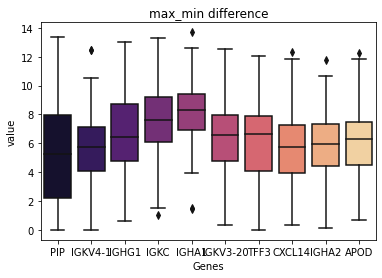

In [25]:
#4
import pandas as pd
tsv =  'breast_cancer_1000_genes.tsv'
genes = pd.read_csv(tsv, sep='\t')
genes = genes.rename(columns={"Unnamed: 0": "Genes"})
genes['max_value'] = genes.max(axis=1)
genes['min_value'] = genes.min(axis=1)
genes['delta'] = genes['max_value']-genes['min_value']
genes = genes.sort_values(by='delta', ascending=False)
genes = genes.set_index('Genes')
genes = genes.drop(['max_value', 'min_value', 'delta'], axis=1)

delta = genes.iloc[:10]
delta = delta.T

genes['std'] = genes.std(axis=1)
genes = genes.sort_values(by='std', ascending=False)
genes = genes.drop(['std'], axis=1)
std = genes.iloc[:10]
std = std.T

genes['Q1'] = genes.quantile(q=0.25, axis=1)
genes['Q3'] = genes.quantile(q=0.75, axis=1)
genes['IQR'] = genes['Q3']-genes['Q1']
genes = genes.sort_values(by='IQR', ascending=False)
genes = genes.drop(['Q1', 'Q3', 'IQR'], axis=1)
IQR = genes.iloc[:10]
IQR = IQR.T

sns.boxplot(x='Genes', y='value', data = pd.melt(delta), palette='magma').set_title('max_min difference')

Text(0.5, 1.0, 'IQR')

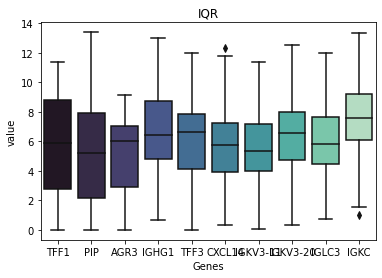

In [24]:
sns.boxplot(x='Genes', y='value', data = pd.melt(IQR), palette='mako').set_title('IQR')

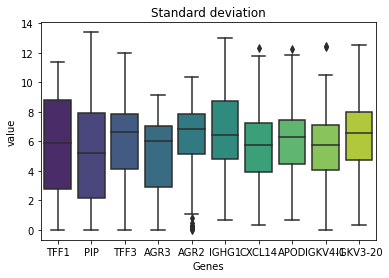

In [23]:
ax = sns.boxplot(x='Genes', y='value', data = pd.melt(std), palette='viridis').set_title('Standard deviation')

[Text(0.5, 0, 'Genes')]

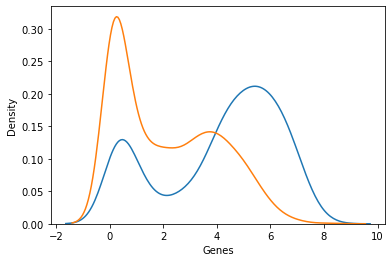

In [38]:
#5
tsv =  'breast_cancer_key_genes.tsv'
genes = pd.read_csv(tsv, sep='\t')
ax = sns.kdeplot(x=genes["ESR1"])
ax = sns.kdeplot(x=genes["PGR"])
ax.set(xlabel='Genes')

ESR1 - estrogen receptor 1
PGR - progesterone receptor

Люди с левым пиком = люди без рецептора, т.е. при использовании гормональной терапии с воздействием эстрогена/прогестерона, данная выборка не будет ей поддаваться. Противоположность - самый правый пик. При этом большее количество людей имеет эстрогеновые рецепторы.
Впадины посередине - люди, у которых примерно средняя экспрессия генов рецепторов, их не так много, как тех, у кого экспрессия нулевая и тех, у кого она высокая, как на правом пике.

#1
У выборки найдём среднее и стандартное отклонение (std  учтёт выбросы - это хорошо).
1) Построим с заданными параметрами плотность распределения на графике violin
2) Увидим среднее, "нормальность" распределения (график должен быть довольно таки симметричным) и стандартное отклонение по вытянутости графика.

#3
Bin(m, teta), где м - количество испытаний, teta - вероятность успехов
1) Посчитать количество результатов в выборке, вывести точку на графике(?)
2) Посчитать частоту встречаемости каждого результата
3) Нарисовать лайнплот (он будет с зигзагами), где по Оу будут частоты встречаемости => посмотреть вероятность появления каждой величины.